In [38]:
import numpy as np
import pandas as pd
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

In [30]:
df = pd.read_csv("data/prostate.csv")
df.head()

,patno,stage,rx,dtime,status,age,wt,pf,hx,sbp,dbp,ekg,hg,sz,sg,ap,bm,sdate,died
0,1,3,0.2 mg estrogen,72,alive,75.0,76.0,normal activity,0,15,9,heart strain,13.798828,2.0,8.0,0.299988,0,2778,0
1,2,3,0.2 mg estrogen,1,dead - other ca,54.0,116.0,normal activity,0,13,7,heart block or conduction def,14.599609,42.0,NaN,0.699951,0,2820,1
2,3,3,5.0 mg estrogen,40,dead - cerebrovascular,69.0,102.0,normal activity,1,14,8,heart strain,13.398438,3.0,9.0,0.299988,0,2933,1
3,4,3,0.2 mg estrogen,20,dead - cerebrovascular,75.0,94.0,in bed < 50% daytime,1,14,7,benign,17.597656,4.0,8.0,0.899902,0,2999,1
4,5,3,placebo,65,alive,67.0,99.0,normal activity,0,17,10,normal,13.398438,34.0,8.0,0.500000,0,3002,0


In [31]:
df.dropna(inplace=True)

In [36]:
rx_dtime = df.groupby("rx")['dtime'].mean()

In [46]:
a = pd.DataFrame(rx_dtime)

In [47]:
a

,dtime
rx,
0.2 mg estrogen,35.067797
1.0 mg estrogen,38.880342
5.0 mg estrogen,34.223140
placebo,35.067227


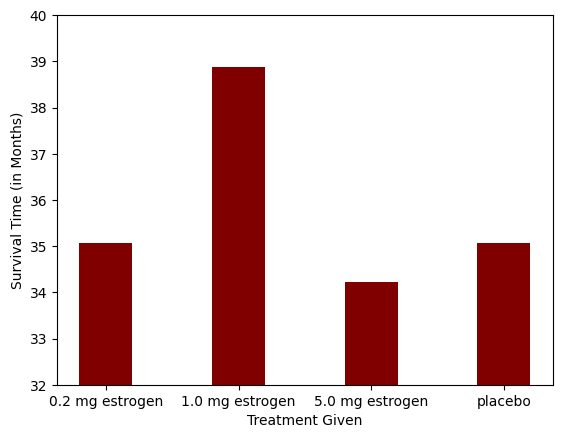

In [65]:
plt.bar(a.index, a.dtime, color ='maroon', width = 0.4)
plt.ylim(32,40)
plt.xlabel("Treatment Given")
plt.ylabel("Survival Time (in Months)")
# plt.title("Students enrolled in different courses")
plt.show()

In [69]:
b = pd.DataFrame(df.groupby("rx")['age'].mean())

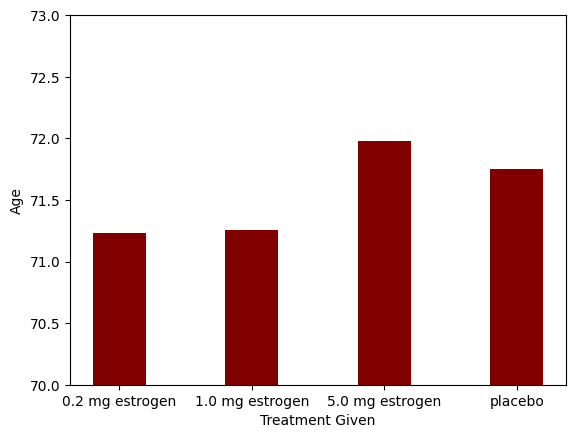

In [74]:
plt.bar(b.index, b.age, color ='maroon', width = 0.4)
plt.ylim(70,73)
plt.xlabel("Treatment Given")
plt.ylabel("Age")
# plt.title("Students enrolled in different courses")
plt.show()

In [94]:
c = pd.DataFrame(df.groupby("rx")['died'].sum())

In [95]:
c

,died
rx,
0.2 mg estrogen,91
1.0 mg estrogen,67
5.0 mg estrogen,91
placebo,89


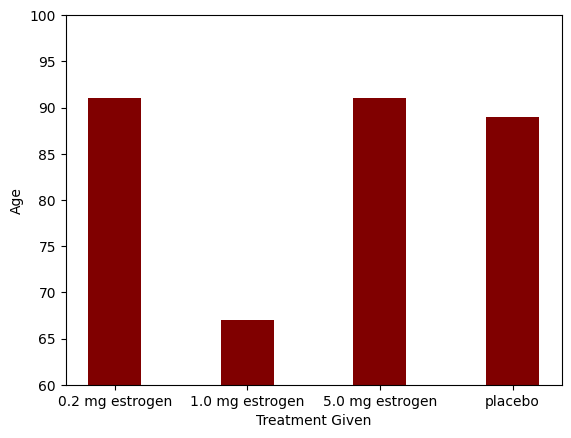

In [97]:
plt.bar(c.index, c.died, color ='maroon', width = 0.4)
plt.ylim(60,100)
plt.xlabel("Treatment Given")
plt.ylabel("Age")
# plt.title("Students enrolled in different courses")
plt.show()

In [98]:
df

,patno,stage,rx,dtime,status,age,wt,pf,hx,sbp,dbp,ekg,hg,sz,sg,ap,bm,sdate,died
0,1,3,0.2 mg estrogen,72,alive,75.0,76.0,normal activity,0,15,9,heart strain,13.798828,2.0,8.0,0.299988,0,2778,0
2,3,3,5.0 mg estrogen,40,dead - cerebrovascular,69.0,102.0,normal activity,1,14,8,heart strain,13.398438,3.0,9.0,0.299988,0,2933,1
3,4,3,0.2 mg estrogen,20,dead - cerebrovascular,75.0,94.0,in bed < 50% daytime,1,14,7,benign,17.597656,4.0,8.0,0.899902,0,2999,1
4,5,3,placebo,65,alive,67.0,99.0,normal activity,0,17,10,normal,13.398438,34.0,8.0,0.500000,0,3002,0
5,6,3,0.2 mg estrogen,24,dead - prostatic ca,71.0,98.0,normal activity,0,19,10,normal,15.099609,10.0,11.0,0.599976,0,3086,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
496,501,4,5.0 mg estrogen,5,dead - heart or vascular,73.0,100.0,normal activity,1,19,10,normal,16.796875,2.0,11.0,2.899902,0,3433,1
497,502,3,1.0 mg estrogen,0,dead - other ca,78.0,108.0,normal activity,0,11,6,normal,15.798828,9.0,13.0,0.599976,0,3297,1
498,503,3,0.2 mg estrogen,41,dead - unspecified non-ca,78.0,127.0,normal activity,1,16,10,heart strain,15.798828,5.0,9.0,0.500000,0,3349,1
499,504,3,1.0 mg estrogen,53,alive,77.0,93.0,normal activity,0,17,10,heart block or conduction def,16.000000,11.0,9.0,0.799927,0,3357,0


In [93]:
df.corr()

/var/folders/kn/5p9n18rd2r58j5lzlvq6zh040000gn/T/ipykernel_11505/1134722465.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


,patno,stage,dtime,age,wt,hx,sbp,dbp,hg,sz,sg,ap,bm,sdate,died
patno,1.000000,0.055097,-0.005353,0.016224,0.069477,-0.007571,-0.012441,-0.088691,0.110811,-0.129167,0.024411,-0.029133,-0.022624,0.122299,0.018169
stage,0.055097,1.000000,-0.144927,-0.057454,-0.099367,-0.094719,-0.038790,-0.049116,-0.180789,0.272503,0.713715,0.216968,0.499785,-0.032147,0.115251
dtime,-0.005353,-0.144927,1.000000,-0.199755,0.111412,-0.171630,-0.005643,0.042441,0.200110,-0.187500,-0.182714,-0.031235,-0.182333,-0.135397,-0.733989
age,0.016224,-0.057454,-0.199755,1.000000,-0.076071,0.170709,0.086339,-0.072702,-0.084249,0.013714,-0.051841,-0.062762,-0.071722,0.103623,0.119082
wt,0.069477,-0.099367,0.111412,-0.076071,1.000000,0.059558,0.191066,0.226465,0.261187,-0.043956,-0.086361,-0.065448,-0.182655,0.052981,-0.107044
hx,-0.007571,-0.094719,-0.171630,0.170709,0.059558,1.000000,0.124112,0.035697,0.018648,-0.091101,-0.150062,-0.034289,-0.075523,0.030355,0.203397
sbp,-0.012441,-0.038790,-0.005643,0.086339,0.191066,0.124112,1.000000,0.628936,0.060840,0.045089,-0.028307,-0.053207,-0.042378,0.004790,0.031817
dbp,-0.088691,-0.049116,0.042441,-0.072702,0.226465,0.035697,0.628936,1.000000,0.143736,-0.047444,-0.073066,-0.060459,-0.082511,-0.006867,-0.023377
hg,0.110811,-0.180789,0.200110,-0.084249,0.261187,0.018648,0.060840,0.143736,1.000000,-0.137529,-0.139663,-0.135464,-0.300424,0.078878,-0.133438
sz,-0.129167,0.272503,-0.187500,0.013714,-0.043956,-0.091101,0.045089,-0.047444,-0.137529,1.000000,0.374827,0.089489,0.253750,-0.096549,0.176498


/var/folders/kn/5p9n18rd2r58j5lzlvq6zh040000gn/T/ipykernel_11505/2438265331.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  plt.matshow(df.corr())


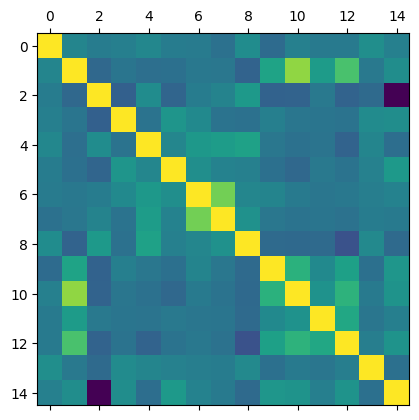

In [92]:
plt.matshow(df.corr())
plt.show()

In [9]:
# Get one hot encoding of columns B
one_hot = pd.get_dummies(df['rx'])
df = df.drop('rx',axis = 1)
df = df.join(one_hot)
df

,patno,stage,dtime,status,age,wt,pf,hx,sbp,dbp,...,sz,sg,ap,bm,sdate,died,0.2 mg estrogen,1.0 mg estrogen,5.0 mg estrogen,placebo
0,1,3,72,alive,75.0,76.0,normal activity,0,15,9,...,2.0,8.0,0.299988,0,2778,0,1,0,0,0
1,2,3,1,dead - other ca,54.0,116.0,normal activity,0,13,7,...,42.0,NaN,0.699951,0,2820,1,1,0,0,0
2,3,3,40,dead - cerebrovascular,69.0,102.0,normal activity,1,14,8,...,3.0,9.0,0.299988,0,2933,1,0,0,1,0
3,4,3,20,dead - cerebrovascular,75.0,94.0,in bed < 50% daytime,1,14,7,...,4.0,8.0,0.899902,0,2999,1,1,0,0,0
4,5,3,65,alive,67.0,99.0,normal activity,0,17,10,...,34.0,8.0,0.500000,0,3002,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
497,502,3,0,dead - other ca,78.0,108.0,normal activity,0,11,6,...,9.0,13.0,0.599976,0,3297,1,0,1,0,0
498,503,3,41,dead - unspecified non-ca,78.0,127.0,normal activity,1,16,10,...,5.0,9.0,0.500000,0,3349,1,1,0,0,0
499,504,3,53,alive,77.0,93.0,normal activity,0,17,10,...,11.0,9.0,0.799927,0,3357,0,0,1,0,0
500,505,4,19,dead - prostatic ca,82.0,96.0,normal activity,1,12,6,...,32.0,13.0,8.398438,0,3311,1,0,0,1,0


In [10]:
# Get one hot encoding of columns B
one_hot = pd.get_dummies(df['status'])
df = df.drop('status',axis = 1)
df = df.join(one_hot)
df

,patno,stage,dtime,age,wt,pf,hx,sbp,dbp,ekg,...,alive,dead - cerebrovascular,dead - heart or vascular,dead - other ca,dead - other specific non-ca,dead - prostatic ca,dead - pulmonary embolus,dead - respiratory disease,dead - unknown cause,dead - unspecified non-ca
0,1,3,72,75.0,76.0,normal activity,0,15,9,heart strain,...,1,0,0,0,0,0,0,0,0,0
1,2,3,1,54.0,116.0,normal activity,0,13,7,heart block or conduction def,...,0,0,0,1,0,0,0,0,0,0
2,3,3,40,69.0,102.0,normal activity,1,14,8,heart strain,...,0,1,0,0,0,0,0,0,0,0
3,4,3,20,75.0,94.0,in bed < 50% daytime,1,14,7,benign,...,0,1,0,0,0,0,0,0,0,0
4,5,3,65,67.0,99.0,normal activity,0,17,10,normal,...,1,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
497,502,3,0,78.0,108.0,normal activity,0,11,6,normal,...,0,0,0,1,0,0,0,0,0,0
498,503,3,41,78.0,127.0,normal activity,1,16,10,heart strain,...,0,0,0,0,0,0,0,0,0,1
499,504,3,53,77.0,93.0,normal activity,0,17,10,heart block or conduction def,...,1,0,0,0,0,0,0,0,0,0
500,505,4,19,82.0,96.0,normal activity,1,12,6,heart strain,...,0,0,0,0,0,1,0,0,0,0


In [11]:
# Get one hot encoding of columns B
one_hot = pd.get_dummies(df['ekg'])
df = df.drop('ekg',axis = 1)
df = df.join(one_hot)
df

,patno,stage,dtime,age,wt,pf,hx,sbp,dbp,hg,...,dead - respiratory disease,dead - unknown cause,dead - unspecified non-ca,benign,heart block or conduction def,heart strain,normal,old MI,recent MI,rhythmic disturb & electrolyte ch
0,1,3,72,75.0,76.0,normal activity,0,15,9,13.798828,...,0,0,0,0,0,1,0,0,0,0
1,2,3,1,54.0,116.0,normal activity,0,13,7,14.599609,...,0,0,0,0,1,0,0,0,0,0
2,3,3,40,69.0,102.0,normal activity,1,14,8,13.398438,...,0,0,0,0,0,1,0,0,0,0
3,4,3,20,75.0,94.0,in bed < 50% daytime,1,14,7,17.597656,...,0,0,0,1,0,0,0,0,0,0
4,5,3,65,67.0,99.0,normal activity,0,17,10,13.398438,...,0,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
497,502,3,0,78.0,108.0,normal activity,0,11,6,15.798828,...,0,0,0,0,0,0,1,0,0,0
498,503,3,41,78.0,127.0,normal activity,1,16,10,15.798828,...,0,0,1,0,0,1,0,0,0,0
499,504,3,53,77.0,93.0,normal activity,0,17,10,16.000000,...,0,0,0,0,1,0,0,0,0,0
500,505,4,19,82.0,96.0,normal activity,1,12,6,12.398438,...,0,0,0,0,0,1,0,0,0,0


In [12]:
# Get one hot encoding of columns B
one_hot = pd.get_dummies(df['pf'])
df = df.drop('pf',axis = 1)
df = df.join(one_hot)
df

,patno,stage,dtime,age,wt,hx,sbp,dbp,hg,sz,...,heart block or conduction def,heart strain,normal,old MI,recent MI,rhythmic disturb & electrolyte ch,confined to bed,in bed < 50% daytime,in bed > 50% daytime,normal activity
0,1,3,72,75.0,76.0,0,15,9,13.798828,2.0,...,0,1,0,0,0,0,0,0,0,1
1,2,3,1,54.0,116.0,0,13,7,14.599609,42.0,...,1,0,0,0,0,0,0,0,0,1
2,3,3,40,69.0,102.0,1,14,8,13.398438,3.0,...,0,1,0,0,0,0,0,0,0,1
3,4,3,20,75.0,94.0,1,14,7,17.597656,4.0,...,0,0,0,0,0,0,0,1,0,0
4,5,3,65,67.0,99.0,0,17,10,13.398438,34.0,...,0,0,1,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
497,502,3,0,78.0,108.0,0,11,6,15.798828,9.0,...,0,0,1,0,0,0,0,0,0,1
498,503,3,41,78.0,127.0,1,16,10,15.798828,5.0,...,0,1,0,0,0,0,0,0,0,1
499,504,3,53,77.0,93.0,0,17,10,16.000000,11.0,...,1,0,0,0,0,0,0,0,0,1
500,505,4,19,82.0,96.0,1,12,6,12.398438,32.0,...,0,1,0,0,0,0,0,0,0,1


In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 502 entries, 0 to 501
Data columns (total 40 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   patno                              502 non-null    int64  
 1   stage                              502 non-null    int64  
 2   dtime                              502 non-null    int64  
 3   age                                501 non-null    float64
 4   wt                                 500 non-null    float64
 5   hx                                 502 non-null    int64  
 6   sbp                                502 non-null    int64  
 7   dbp                                502 non-null    int64  
 8   hg                                 502 non-null    float64
 9   sz                                 497 non-null    float64
 10  sg                                 491 non-null    float64
 11  ap                                 502 non-null    float64

## K-Means Clustering

In [19]:
def build_int_cluster_data(data, num_clusters=10):
    kmeans = KMeans(
        n_clusters=num_clusters, 
        init="k-means++",
        n_init=10,
        tol=1e-04, 
        random_state=42
    )
    kmeans.fit(data)
    clusters=pd.DataFrame(data,columns=data.columns)
    clusters[f'label_{num_clusters}']=kmeans.labels_
    return clusters

In [23]:
for k in range(2,10):
    clusters = build_int_cluster_data(df, num_clusters=k)

In [24]:
df.to_csv('data/df_clusters.csv')

In [25]:
df

,patno,stage,dtime,age,wt,hx,sbp,dbp,hg,sz,...,in bed > 50% daytime,normal activity,label_2,label_3,label_4,label_5,label_6,label_7,label_8,label_9
0,1,3,72,75.0,76.0,0,15,9,13.798828,2.0,...,0,1,0,1,3,3,2,2,2,2
2,3,3,40,69.0,102.0,1,14,8,13.398438,3.0,...,0,1,0,1,3,3,2,2,4,2
3,4,3,20,75.0,94.0,1,14,7,17.597656,4.0,...,0,0,0,2,0,3,3,0,4,2
4,5,3,65,67.0,99.0,0,17,10,13.398438,34.0,...,0,1,0,2,0,3,3,0,4,2
5,6,3,24,71.0,98.0,0,19,10,15.099609,10.0,...,0,1,0,2,0,0,3,0,4,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
496,501,4,5,73.0,100.0,1,19,10,16.796875,2.0,...,0,1,1,0,2,2,5,1,6,3
497,502,3,0,78.0,108.0,0,11,6,15.798828,9.0,...,0,1,1,0,2,2,5,1,6,3
498,503,3,41,78.0,127.0,1,16,10,15.798828,5.0,...,0,1,1,0,2,2,5,1,6,3
499,504,3,53,77.0,93.0,0,17,10,16.000000,11.0,...,0,1,1,0,2,2,5,1,6,3
